In [1]:
import torch
import random
import matplotlib.pyplot as plt

In [2]:
torch.normal(0,1,(10,2)), torch.normal(0,0.1,(10,2))

(tensor([[ 1.5079, -0.9240],
         [-0.0240,  2.1191],
         [-0.7400, -1.2657],
         [ 0.4183,  1.0202],
         [-1.1977,  1.1637],
         [ 0.1683, -1.2569],
         [-0.1462,  1.3500],
         [-1.2073,  0.9583],
         [-0.0557,  1.7702],
         [-0.9378,  0.1738]]),
 tensor([[-0.1631,  0.0170],
         [ 0.0726,  0.1518],
         [-0.1213,  0.2629],
         [-0.0913, -0.0416],
         [-0.0111,  0.0041],
         [ 0.1244,  0.1380],
         [ 0.0464,  0.0236],
         [-0.1958,  0.1306],
         [ 0.0045,  0.0578],
         [-0.0929,  0.2033]]))

In [3]:
# generating synthetic dataset

import numpy as np

def make_dataset(size=1000, true_weight=torch.tensor([2, -3.4]), true_bias=4.2):
    X = torch.normal(0,1, (size, len(true_weight)))
    y = torch.matmul(X,true_weight) + true_bias
    # now we add for noise, mean =0, standard deviation = 0.1
    y += torch.normal(0,0.1, y.shape)
    return X, y.reshape(-1,1) # this work same as unsqueeze

In [4]:
features, labels = make_dataset()

In [5]:
features[0], labels[0]

(tensor([0.9499, 0.7587]), tensor([3.5416]))

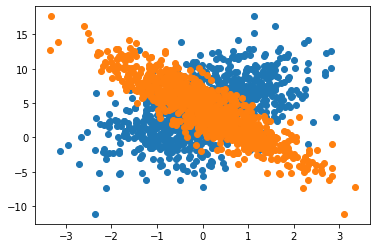

In [6]:
plt.plot(features.detach(),labels.detach(),'o')

In [7]:
# reading the dataset, and giving based on batch size

def read_iter(batch_size, features, labels):
    indices = list(range(len(features)))
    random.shuffle(indices)
    new_features = features[indices]
    new_labels = labels[indices]
    
#     print(new_features[:5], features[:5])
    for i in range(0,len(features), batch_size):
        yield new_features[i:min(i+batch_size, len(features))], new_labels[i:min(i+batch_size, len(features))]
        

In [8]:
train_dataloader= read_iter(32, features, labels)

In [9]:
for data, label in train_dataloader:
    print(data, label)
    break

tensor([[ 1.1882,  0.1925],
        [ 1.0664,  1.4002],
        [ 0.7215,  0.1771],
        [-1.8089,  1.6860],
        [-0.2288, -0.9540],
        [ 1.1609,  0.6905],
        [-1.0060, -0.0216],
        [ 0.5956,  1.5831],
        [ 0.4638,  0.5000],
        [ 0.4243, -0.8270],
        [ 0.6041,  1.1139],
        [ 0.0749, -0.6459],
        [-0.6913,  0.0024],
        [ 0.9387,  0.1620],
        [ 0.1055, -0.4127],
        [-0.8365, -1.0044],
        [-2.1215,  2.2031],
        [-0.9858, -1.7718],
        [ 0.6329, -0.3364],
        [-0.1283,  0.2220],
        [ 1.5119, -1.0081],
        [-0.6682, -0.4356],
        [-0.6518, -0.2682],
        [ 0.3530,  0.7120],
        [ 1.3663,  0.4124],
        [-0.8729, -0.8116],
        [-1.7319,  0.0763],
        [ 0.2148,  1.7989],
        [-0.7713,  1.3779],
        [ 0.8470,  0.5196],
        [ 1.8815, -0.2113],
        [ 1.3892,  1.7796]]) tensor([[ 6.0323],
        [ 1.5687],
        [ 5.1568],
        [-5.0981],
        [ 6.9285],
        

In [10]:
# we before training would initialize the model
w = torch.normal(0,0.1, (2,1), requires_grad = True)
b = torch.zeros(1,requires_grad=True)

In [11]:
# define the model

def linreg(X,w,b):
    return torch.matmul(X, w) + b
    

In [12]:
#loss function

def squared_loss(y_hat, y):
#      print(y_hat.shape, y.shape)
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [13]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [14]:
lr = 0.03
num_epochs =100
batch_size=32
   

In [15]:
# training loop
for epoch in range(num_epochs):
    train_dataloader= read_iter(batch_size, features, labels)
    for X, y in train_dataloader:
        l = squared_loss(linreg(X,w,b), y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
        
    
    with torch.no_grad():
        train_l = squared_loss(linreg(features, w, b), labels)
        print("Loss for current epoch ", epoch, ":", train_l.mean())
#         print("the value of w: ", w, " The value of b: ", b)
        

Loss for current epoch  0 : tensor(2.5705)
Loss for current epoch  1 : tensor(0.4197)
Loss for current epoch  2 : tensor(0.0721)
Loss for current epoch  3 : tensor(0.0156)
Loss for current epoch  4 : tensor(0.0065)
Loss for current epoch  5 : tensor(0.0051)
Loss for current epoch  6 : tensor(0.0048)
Loss for current epoch  7 : tensor(0.0048)
Loss for current epoch  8 : tensor(0.0048)
Loss for current epoch  9 : tensor(0.0048)
Loss for current epoch  10 : tensor(0.0048)
Loss for current epoch  11 : tensor(0.0048)
Loss for current epoch  12 : tensor(0.0048)
Loss for current epoch  13 : tensor(0.0048)
Loss for current epoch  14 : tensor(0.0048)
Loss for current epoch  15 : tensor(0.0048)
Loss for current epoch  16 : tensor(0.0048)
Loss for current epoch  17 : tensor(0.0048)
Loss for current epoch  18 : tensor(0.0048)
Loss for current epoch  19 : tensor(0.0048)
Loss for current epoch  20 : tensor(0.0048)
Loss for current epoch  21 : tensor(0.0048)
Loss for current epoch  22 : tensor(0.0048

In [16]:
w, torch.tensor([2, -3.4])

(tensor([[ 2.0013],
         [-3.4051]], requires_grad=True),
 tensor([ 2.0000, -3.4000]))

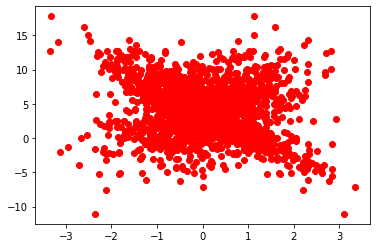

In [17]:
plt.plot(features.detach(), linreg(features,w,b).detach(), 'ro')

Exercises
1. What would happen if we were to initialize the weights to zero. Would the algorithm still
work?
2. Assume that you are Georg Simon Ohm48 trying to come up with a model between voltage
and current. Can you use auto differentiation to learn the parameters of your model?
3. Can you use Planckʼs Law49 to determine the temperature of an object using spectral energy
density?
4. What are the problems you might encounter if you wanted to compute the second derivatives? How would you fix them?
5. Why is the reshape function needed in the squared_loss function?
6. Experiment using different learning rates to find out how fast the loss function value drops.
7. If the number of examples cannot be divided by the batch size, what happens to the
data_iter functionʼs behavior?

In [18]:
#1

w = torch.zeros(2, dtype=torch.float32)

w = torch.tensor([0.,0.])
w, b

(tensor([0., 0.]), tensor([4.2058], requires_grad=True))

In [19]:
try:
    for epoch in range(num_epochs):
        for X, y in read_iter(batch_size, features, labels):
            l = squared_loss(linreg(X,w,b), y)
            l.sum().backward()

            print(w.grad, b.grad)

            sgd([w,b], lr, batch_size)

        with torch.no_grad():
            train_l = squared_loss(linreg(features, w, b), labels)
            print("Loss for current epoch ", epoch, ":", train_l.mean())

except Exception as e:
    print(e)
        
        

None tensor([0.4199])
unsupported operand type(s) for *: 'float' and 'NoneType'


In [20]:
#2 

# lets first get the values

def ohmic_values(n, r = torch.tensor([5.])):
    # V = IR
    
    I = torch.normal(0, 1,(n,len(r)))
    
    V= torch.matmul(I, r)
    
    return I, V
    
    

In [21]:
features, labels = ohmic_values(n=1000)

In [22]:
type(features), type(labels)

(torch.Tensor, torch.Tensor)

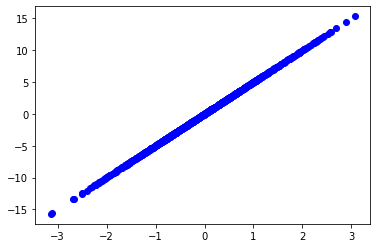

In [23]:
plt.plot(features.detach(), labels.detach(), "bo")

In [24]:
# initialising w and b

w =  torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

In [25]:
features.shape, w.shape

(torch.Size([1000, 1]), torch.Size([1]))

In [26]:
# now lets get the model 

def linreg_ohm(X, w, b):
    return torch.matmul(X,w) + b

linreg_ohm(features, w, b)[:5]
    

tensor([ 2.1420, -1.1170, -0.3566,  5.0606,  0.7062], grad_fn=<SliceBackward>)

In [27]:
def training_loop(num_epochs=3, loss=squared_loss, sgd=sgd, data_iter=read_iter, net=linreg, lr=lr, batch_size=batch_size, w=w, b=b, features=features, display=True, labels=labels):
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size,features, labels):
            l = loss(net(X,w,b), y)
            
            l.sum().backward()
            
            sgd([w,b], lr, batch_size)
        
        if(display):
            with torch.no_grad():
                train_l = loss(net(features, w, b), labels)
            
                print(f"for epoch: {epoch}, the loss: {train_l.mean()}")
            
        

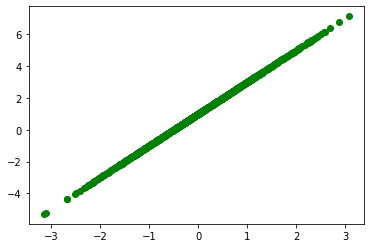

In [28]:
plt.plot(features.detach(), linreg_ohm(features, w, b).detach(), "go")

In [29]:
training_loop(net=linreg_ohm )

for epoch: 0, the loss: 0.709113359451294
for epoch: 1, the loss: 0.09603991359472275
for epoch: 2, the loss: 0.01300217304378748


In [30]:
w, b

(tensor([4.8536], requires_grad=True), tensor([0.0584], requires_grad=True))

In [31]:
training_loop(net=linreg_ohm, num_epochs=4)

for epoch: 0, the loss: 0.0017656516283750534
for epoch: 1, the loss: 0.00023989191686268896
for epoch: 2, the loss: 3.2662592275300995e-05
for epoch: 3, the loss: 4.458317107491894e-06


In [32]:
w, b

(tensor([4.9974], requires_grad=True), tensor([0.0013], requires_grad=True))

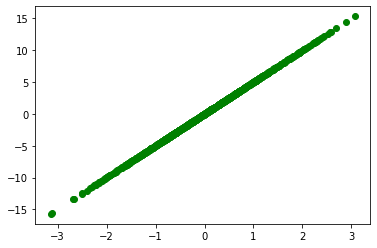

In [33]:
plt.plot(features.detach(), linreg_ohm(features, w, b).detach(), "go")

#3

formula for spectral density:

![](spectral_density.png)

In [34]:
def spectral_density_formula(t, l=1):
    # lets put l =1
    h = 6.626 * (10 ** -34)
    c = 3 * (10 ** 8)
    l = l
    k = 1.38064852 * (10 ** -23)
    p =  (2 * h * (c**2))/(l ** 5)
    d = (h * c/(l * k * t))
    
    return p/(np.exp(d)-1)

In [35]:
spectral_density_formula(100)

8.2832947943081e-13

In [36]:
w =  torch.tensor([10.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

In [37]:
def make_dataset(n=100):
    X = torch.arange(100, dtype=torch.float32).unsqueeze(dim=1)
    print(X.shape)
    y = []
    for i in X.detach():
        y.append(spectral_density_formula(i))
    
    return X, torch.tensor(y)

In [38]:
features, labels = make_dataset()

torch.Size([100, 1])


In [39]:
features[:10], labels[:10]

# maybe noramlisation would be a problem here

(tensor([[0.],
         [1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 tensor([0.0000e+00, 8.2244e-15, 1.6508e-14, 2.4792e-14, 3.3076e-14, 4.1360e-14,
         4.9645e-14, 5.7929e-14, 6.6210e-14, 7.4497e-14]))

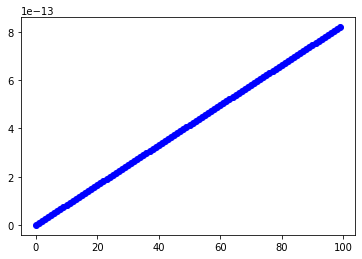

In [40]:
plt.plot(features, labels, "bo")

In [41]:
w, b

(tensor([10.], requires_grad=True), tensor([1.], requires_grad=True))

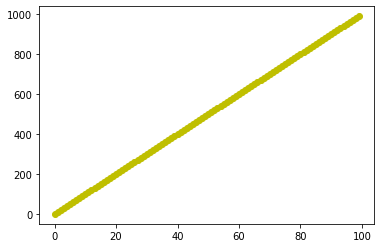

In [42]:
plt.plot(features.detach(), linreg(features,w, b).detach(), 'yo')

In [43]:
for lr in [0.00001, 0.0001, 0.001, 0.1]:
    print(f"\nFor learning rate {lr}")
    training_loop(num_epochs=10, lr = lr)


For learning rate 1e-05
for epoch: 0, the loss: 4.45768955614767e-06
for epoch: 1, the loss: 4.457195245777257e-06
for epoch: 2, the loss: 4.4565676944330335e-06
for epoch: 3, the loss: 4.456256192497676e-06
for epoch: 4, the loss: 4.455689122551121e-06
for epoch: 5, the loss: 4.455135240277741e-06
for epoch: 6, the loss: 4.454559075384168e-06
for epoch: 7, the loss: 4.453937890502857e-06
for epoch: 8, the loss: 4.453444489627145e-06
for epoch: 9, the loss: 4.452819666767027e-06

For learning rate 0.0001
for epoch: 0, the loss: 4.421431640366791e-06
for epoch: 1, the loss: 4.3899108277400956e-06
for epoch: 2, the loss: 4.356116278358968e-06
for epoch: 3, the loss: 4.327397618908435e-06
for epoch: 4, the loss: 4.2978090277756564e-06
for epoch: 5, the loss: 4.264185918145813e-06
for epoch: 6, the loss: 4.2335195757914335e-06
for epoch: 7, the loss: 4.20419019064866e-06
for epoch: 8, the loss: 4.1735515878826845e-06
for epoch: 9, the loss: 4.141968474868918e-06

For learning rate 0.001
f

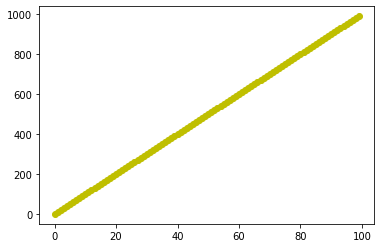

In [44]:
plt.plot(features.detach(), linreg(features,w, b).detach(), 'yo')

In [45]:
w, b

(tensor([10.], requires_grad=True), tensor([1.], requires_grad=True))

# Concise way to build linear networks

In [46]:
true_weight= torch.tensor([2, -3.4])
true_bias = 4.2

In [47]:
def make_dataset(size=1000, true_weight=torch.tensor([2, -3.4]), true_bias=4.2):
    X = torch.normal(0,1, (size, len(true_weight)))
    y = torch.matmul(X,true_weight) + true_bias
    # now we add for noise, mean =0, standard deviation = 0.1
    y += torch.normal(0,0.1, y.shape)
    return X, y.reshape(-1,1) # this work same as unsqueeze
features, labels = make_dataset(true_weight=true_weight, true_bias=4.2)

In [48]:
from torch.utils import data
batch_size=32

In [49]:
# reading the dataset

def read_dataset(data_arrays):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset=dataset, shuffle=True, batch_size=batch_size)

In [50]:
train_dataloader = read_dataset((features, labels))

In [51]:
for X, y in train_dataloader:
    print(X[:5], y[:5])
    break

tensor([[ 1.4435, -0.4532],
        [-1.3487, -0.1699],
        [ 0.4914,  0.3991],
        [-0.2511,  0.0908],
        [-1.6312,  0.7284]]) tensor([[ 8.5408],
        [ 2.0157],
        [ 3.9867],
        [ 3.6202],
        [-1.4610]])


In [52]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [53]:
net

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)

In [54]:
net[0].weight.data.normal_(0,0.1)
net[0].bias.data.fill_(0)

tensor([0.])

In [55]:
net[0].weight, net[0].bias

(Parameter containing:
 tensor([[-0.1904,  0.1160]], requires_grad=True),
 Parameter containing:
 tensor([0.], requires_grad=True))

In [56]:
loss = nn.MSELoss(reduction='sum')

In [57]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [58]:
for epoch in range(3):
    for X, y in train_dataloader:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    
    l = loss(net(features), labels)
    print(f'for epoch {epoch}, loss : {l}')

for epoch 0, loss : 27.84557342529297
for epoch 1, loss : 10.681341171264648
for epoch 2, loss : 22.750896453857422


In [59]:
net[0].weight, net[0].bias

(Parameter containing:
 tensor([[ 1.9952, -3.4191]], requires_grad=True),
 Parameter containing:
 tensor([4.3091], requires_grad=True))

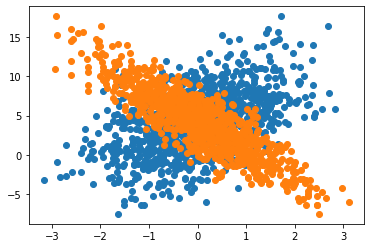

In [65]:
plt.plot(features.detach(), net(features).detach(), 'o')

### Exercises
1. If we replace nn.MSELoss(reduction='sum') with nn.MSELoss(), how can we change the
learning rate for the code to behave identically. Why?
2. Review the PyTorch documentation to see what loss functions and initialization methods are
provided. Replace the loss by Huberʼs loss.
3. How do you access the gradient of net[0].weight?

In [60]:
# 3
net[0].weight.grad

tensor([[-0.8798,  0.5154]])

In [ ]:
# 2

loss = torrch.nn.SmoothL1Loss